## Supplementary Figure 6

Batch 2 UMAP

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "supfigure6")
extensions <- c(".png", ".pdf")

In [3]:
results_dir <- file.path("../1.Data-exploration/Profiles_level4/")

cp_df <- load_embeddings_data(assay="cellpainting", cell_painting_batch = "batch2", results_dir = results_dir)

cp_df$Metadata_time_point <- factor(cp_df$Metadata_time_point, levels = c("6H", "24H", "48H"))

print(dim(cp_df))
head(cp_df, 3)

[1] 51447    37


Metadata_plate_map_name,Metadata_cell_line,Metadata_time_point,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_volume_ul,Metadata_amount_mg,Metadata_Plate,⋯,Metadata_alternative_target,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_dose_recode,UMAP_0,UMAP_1,TSNE_0,TSNE_1,dmso_label,assay
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LKCP001_MCF7_6H,MCF7,6H,DMSO,0.0,0.0,DMSO,10,0.0,BR00092670,⋯,NA,BR00092670,LKCP001_MCF7_6H,1,6.469576,-4.411047,1.931575,-5.6475370,DMSO,Cell Painting
LKCP001_MCF7_6H,MCF7,6H,DMSO,0.0,0.0,DMSO,10,0.0,BR00092670,⋯,NA,BR00092670,LKCP001_MCF7_6H,1,6.202775,-3.773242,3.484661,-0.5014683,DMSO,Cell Painting
LKCP001_MCF7_6H,MCF7,6H,DMSO,0.0,0.0,DMSO,10,0.0,BR00092670,⋯,NA,BR00092670,LKCP001_MCF7_6H,1,6.232362,-4.093251,7.047605,-5.8578380,DMSO,Cell Painting


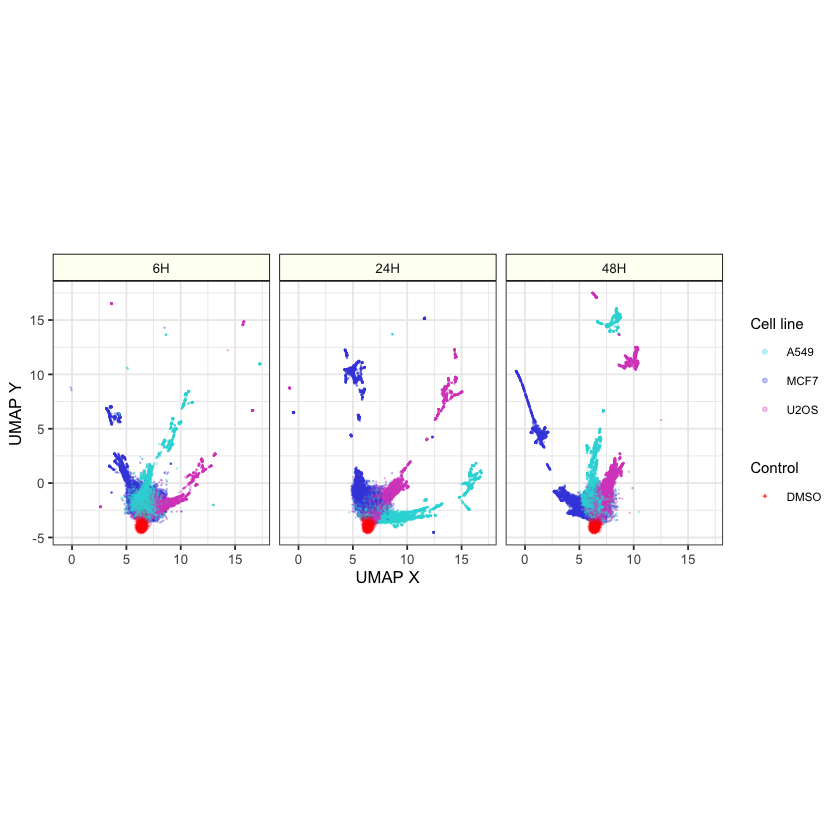

In [4]:
supfig6_gg <- (
    ggplot(data = NULL, aes(x = UMAP_0, y = UMAP_1, color = Metadata_cell_line, size = highlight_moa, alpha = highlight_moa))
    + geom_point(data = cp_df %>% dplyr::filter(dmso_label != "DMSO"), size = 0.05, alpha = 0.3)
    + geom_point(data = cp_df %>% dplyr::filter(dmso_label == "DMSO"), size = 0.4, color = "red", alpha = 0.1, aes(shape = dmso_label))
    + figure_theme
    + facet_grid("~Metadata_time_point")
    + scale_shape_manual("Control", values = c("DMSO" = 3))
    + xlab("UMAP X")
    + ylab("UMAP Y")
    + guides(
        alpha = FALSE,
        shape = guide_legend(override.aes = list(alpha = 0.8)),
        color = guide_legend(override.aes = list(size = 1))
    )
    + scale_color_manual("Cell line", values = cell_line_colors)
    + coord_fixed()
)

supfig6_gg

In [5]:
for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, supfig6_gg, width = 8, height = 3, dpi = 500)
}